In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample_a = pd.read_csv('ab_test-redesign_sample_a.zip')
sample_b = pd.read_csv('ab_test-redesign_sample_b.zip')

In [3]:
display(sample_a.head())
display(sample_b.head())

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


In [4]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [5]:
display(sample_a.info())
display(sample_b.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61571 non-null  datetime64[ns]
 1   cid           61571 non-null  float64       
 2   transactions  61571 non-null  int64         
 3   revenue       61571 non-null  int64         
 4   group         61571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61383 non-null  datetime64[ns]
 1   cid           61383 non-null  float64       
 2   transactions  61383 non-null  int64         
 3   revenue       61383 non-null  int64         
 4   group         61383 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


None

In [10]:
df_a = sample_a.groupby('date').agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'client_count'})
df_a

,date,client_count,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984
5,2020-11-11,3218,19,1209656
6,2020-11-12,3467,19,607839
7,2020-11-13,3676,36,1338816
8,2020-11-14,3372,30,2659277
9,2020-11-15,3881,27,1189970


In [11]:
df_b = sample_b.groupby('date').agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'client_count'})
df_b

,date,client_count,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726
5,2020-11-11,3208,22,3555727
6,2020-11-12,3494,25,915653
7,2020-11-13,3606,37,1703475
8,2020-11-14,3276,34,2369998
9,2020-11-15,3919,27,1147144


In [19]:
# объявляем функцию для расчёта кумулятивных показателей
def calculate_cum(data):
    data['cum_users_count'] = data['client_count'].cumsum()
    data['cum_transactions'] = data['transactions'].cumsum()
    data['cum_revenue'] = data['revenue'].cumsum()
    data['cum_conversion'] = data['cum_transactions']/data['cum_users_count'] * 100
    data['cum_mean_check'] = data['cum_revenue']/data['cum_transactions']
    return data
# применяем функцию для каждого набора данных:
daily_sample_a = calculate_cum(df_a)
daily_sample_b = calculate_cum(df_b)
# вычислим среднюю кумулятивную конверсию в каждой группе
print(round(daily_sample_a['cum_conversion'].mean(), 2))
print(round(daily_sample_b['cum_conversion'].mean(), 2))

0.71
0.76


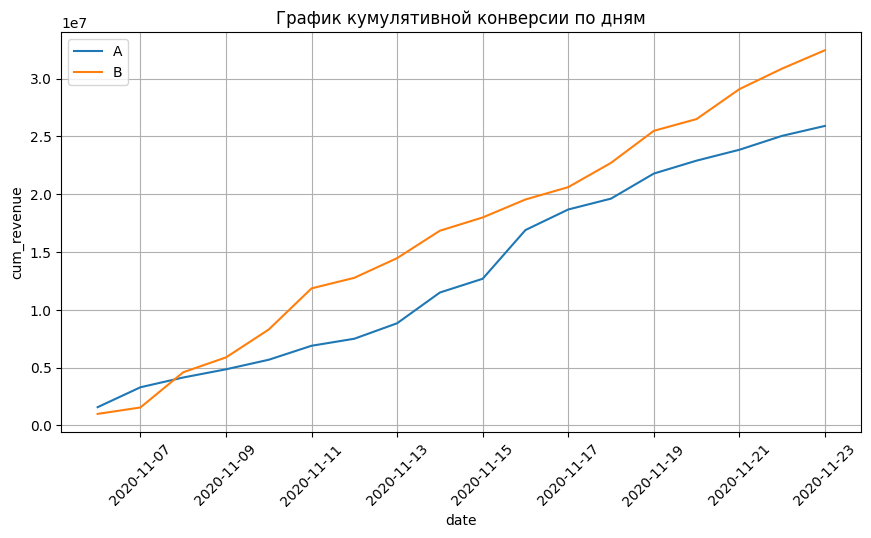

In [24]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_revenue', data=daily_sample_a, ax=ax, label = 'A')
sns.lineplot(x='date', y='cum_revenue', data=daily_sample_b, ax=ax, label = 'B')
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=daily_sample_a, ax=ax, label = 'A')
sns.lineplot(x='date', y='cum_conversion', data=daily_sample_b, ax=ax, label = 'B')
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);